In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from matplotlib.widgets import Slider, Button
%matplotlib notebook

Given a dataset $X_1,...,X_n \overset{iid}{\sim} f_{\theta}(x)=\theta x^{-\theta-1}\mathbb{1}_{x\gt 1}, \theta \gt 0$ (This is called a [Pareto](https://en.wikipedia.org/wiki/Pareto_distribution) distribution.)
1. Calculate the MLE and Fisher Information for $\theta$
2. Give the Likelihood ratio test with level $\alpha = 0.05$ to thest if $\theta = 2$
3. Give Wald's test with level $\alpha = 0.05$ to test if $\theta = 2$
4. Assume $n = 100$ and $\hat{\theta} = 2.45$. Compute the asymptotic p-value of both tests.

So we are looking at the following hypotheses

$$H_0: \theta = 2$$
$$H_1: \theta \ne 2$$

## Review:  Walds test

Wald's test is based on the fact that the Maximum Likelihood Estimator is asymptotically normal with mean $0$ and with variance equal to the inverse of the Fisher Information.

$$\sqrt{n}\left(\hat{\theta}_{\text{MLE}} - \theta_0\right)\overset{(d)}{\to}\mathcal{N}(0, \frac{1}{I(\theta)})$$

If we re-scale using the Fisher Information we can then write

$$\sqrt{n}\sqrt{I(\theta)}\left(\hat{\theta}_{\text{MLE}} - \theta_0\right)\overset{(d)}{\to}\mathcal{N}(0,1)$$

Moreover squaring both sides gives us

$$nI(\theta)\left( \hat{\theta}_{\text{MLE}} - \theta_0\right)^2  \overset{(d)}{\to} \mathcal{N}^2(0,1) = \chi^2(1)$$

Where the square of the standard normal distribution is the Chi Squared distribution.

Notice that the expression above has the unknown parameter $\theta$ in the left hand side.  Since we have an expression that converges in distribution we can take advantage of the central limit theorem to use our estimator $\hat{\theta}$ and then we have a test statistic that does not depend on $\theta$.

$$nI(\hat{\theta}_{\text{MLE}})\left( \hat{\theta}_{\text{MLE}} - \theta_0\right)^2  \overset{(d)}{\to} \mathcal{N}^2(0,1) = \chi^2(1)$$

## Review: Likelihood ratio test

The likelihood ratio test looks at the likelihood of seeing the data under the null hypothesis vs seeing the data under the alternative hypothesis.

$$\frac{L(X_0,...,X_n;\Theta_1)}{L(X_0,...,X_n;\Theta_0)} \gt c$$

Where in general both the numerator and the denominator are taken to be the largest that each likelihood can be over the partition of the parameter space in question.

We can think of this ratio as: when the likelihood of seeing the data when the alternative hypothesis is true is much larger than the likelihood of seeing the data when the null hypothesis is true we should reject the null hypothesis.  In particular we fix a pre-determined constant $c$ that we choose based on our desired level of test and reject when the ratio is larger than $c$.

#### Calculate the MLE and the Fisher Information

For Wald's test we need to know the Fisher Information, and for the Likelihood Ratio Test we need the MLE, so let's compute those.

##### MLE - $\hat{\theta}^{\text{MLE}}$

The likelihood function is given by

$$L(X_1,...,X_n;\theta) = \prod_{i=1}^nf_\theta(X_i)=\prod_{i=1}^n\theta x^{-\theta -1}$$

Expanding the right had side we get

$$\theta^n \left(\prod_{i=1}^n X_i\right)^{-\theta - 1}$$

Now we want to maximize this function, but since the derivative of this expression is not that easy to compute we use the technique of maximizing the natural log of the expression which will give the same result.  So by taking the natural log of both sides we get 

$$\ln(L(X_1,...,X_n;\theta))=l(X_1,...X_n;\theta)=n \ln(\theta) + (-\theta -1)\sum_{i=1}^n\ln(X_i)$$

Differntiating we get

$$\frac{\partial}{\partial{\theta}}\left(n \ln(\theta) + (-\theta -1)\sum_{i=1}^n\ln(X_i)\right) = \frac{n}{\theta} -\theta\sum_{i=1}^n\ln(X_i)$$

And if we set this equal to zero and solve for $\theta$ we will find a candidate for the $\hat{\theta}_{\text{MLE}}$. That is

$$\theta=\frac{n}{\sum_{i=1}^n\ln(X_i)}$$

Do we have a maxima?  We take the second derivative

$$\frac{\partial}{\partial{\theta}}\left(\frac{n}{\theta} -\theta\sum_{i=1}^n\ln(X_i)\right)=-\frac{n}{\theta^2}$$

Which is negative so we do have a maxima and we are indeed justified in calling it the maximum likelihood estimator.

$$\hat{\theta}_{\text{MLE}}=\frac{n}{\sum_{i=1}^n\ln(X_i)}$$

##### Fisher Information - $I(\theta)$

Recall that the Fisher Information is the expectation of the negative of the second derivative of the log likelihood for a single observation.  It is how much information we get by looking at a single sample.  So we need to look at the log likelihood of a single observation

$$l(X_1;\theta)=\ln\left(\theta X_1^{-\theta -1}\right)=\ln(\theta) + (-\theta -1)\ln(X_1)$$

Thus

$$\frac{\partial^2{l}}{\partial{\theta^2}}=\frac{-1}{\theta^2}$$

So

$$I(\theta) = \mathbb{E}\left[-\frac{\partial^2{l}}{\partial{\theta^2}} \right]=\mathbb{E}\left[-\left(\frac{-1}{\theta^2}\right) \right]= \mathbb{E}\left[ \frac{1}{\theta^2}\right]$$

But $1/\theta^2$ does not depend on $X_1$ so the expectation is just the constant $1/\theta^2$

$$I(\theta) = \frac{1}{\theta^2}$$

## Wald's Test

Wald's test uses the fact that $n$ times the Fisher Information times the squared difference of the MLE from the true parameter converges in distribution to the Chi Squared distribution

$$nI(\hat{\theta}_{\text{MLE}})\left( \hat{\theta}_{\text{MLE}} - \theta_0\right)^2\overset{(d)}{\to} \chi^2_1$$

Recall that the Chi Squared distribution with nultiple degrees of freedom looks like a skewed normal with a peak near 0 and with a long tail that drops off to $0$.  The limiting case is where the degrees of freedom is 1, which is our case.  Here is a little widget to explore the Chi Squared distribution.

<IPython.core.display.Javascript object>


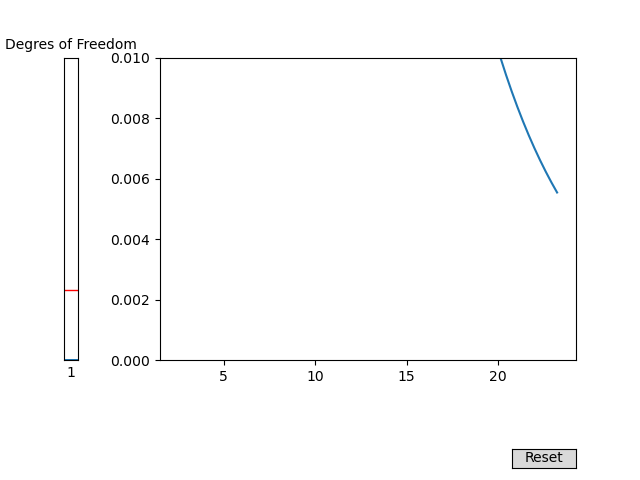

In [46]:
fig, ax = plt.subplots(1,1)
# generate a set of x values to plot against.  We plot 201 points from the first to the 99th percentile
df_0 = 10
x=np.linspace(chi2.ppf(0.01, df_0), chi2.ppf(0.99, df_0), 201)
line, = ax.plot(x,chi2.pdf(x,df_0))
fig.subplots_adjust(left=0.25, bottom=0.25)
axdf = fig.add_axes([0.1, 0.25, 0.0225, 0.63])

df_slider = Slider(
    ax=axdf,
    label='Degres of Freedom',
    valmin=1,
    valmax=40,
    valinit=df_0,
    orientation="vertical",
    valfmt="%0.0f"
)
def getMax(df):
    m = 0
    for val in x:
        if chi2.pdf(val,df) > m:
            m = chi2.pdf(val,df)
    return m

def update(val):
    x=np.linspace(chi2.ppf(0.01, df_slider.val), chi2.ppf(0.99, df_slider.val),201)
    line.set_ydata(chi2.pdf(x,df_slider.val))
    if df_slider.val >= 2:
        ax.set_ylim([0,1.1*chi2.pdf(df_slider.val-2,df_slider.val)])
    else:
        ax.set_ylim([0,chi2.cdf(chi2.ppf(0.01, 1),1)])
    fig.canvas.draw_idle()
    
def reset(event):
    df_slider.reset()

resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, "Reset", hovercolor="0.975")

button.on_clicked(reset)
df_slider.on_changed(update)
plt.show()

The density is concentrated close to zero.  So our test statistic should be close to zero if our true parameter is close to the MLE.  So if we look at

$$n\frac{1}{\hat{\theta}_{\text{MLE}}^2}\left( \hat{\theta}_{\text{MLE}} - \theta_0\right)^2$$

then the larger this value is, the less likely it is that our data was generated from a Chi squared distribution.  We will call this statistic $T_n$ to indicate that we are calculating it from our data

$$T_n = n\frac{1}{\hat{\theta}_{\text{MLE}}^2}\left( \hat{\theta}_{\text{MLE}} - \theta_0\right)^2$$

This means that our test can be written as

$$\psi = \mathbb{1}_{T_n \ge q_{\alpha}}$$

Where here by $q_{\alpha}$ we mean the $\alpha$  quantile of the Chi Squared distribution. That is the same as saying that we will reject the null hypothesis if the tail probability of our Chi Squared distribution is greater than 5%.  We have the picture below.

<IPython.core.display.Javascript object>


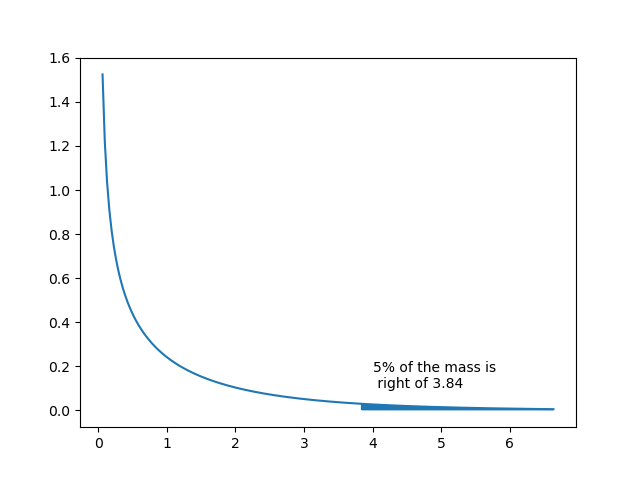

In [35]:
fig, ax = plt.subplots(1,1)
df_0 = 1
x=np.linspace(chi2.ppf(0.2, df_0), chi2.ppf(0.99, df_0), 201)
line, = ax.plot(x,chi2.pdf(x,df_0))
ax.vlines(chi2.ppf(0.95,1),0,chi2.pdf(chi2.ppf(0.95,1),1))
rejection_region = np.linspace(chi2.ppf(0.95,1),chi2.ppf(0.99, df_0), 201) 
ax.fill_between(rejection_region,chi2.pdf(rejection_region,1))
q_05 = round(chi2.ppf(0.95,1),2)
ax.text(4,0.1,"5% of the mass is\n right of " + str(q_05))
ax.vlines(chi2.ppf(0.95,1),0,chi2.pdf(chi2.ppf(0.95,1),1))
plt.show()

And in a similar vein we consider the Likelihood Ratio test.  In this case we have our test statistic based on the log likelihood function $l(X_1,...,X_n;\theta)$

$$T_{n}^{\prime} = 2\left(l(X_1, ..., X_n;\hat{\theta}_{\text{MLE}}) - l(X_1,...,X_n;\theta_0)\right)$$

where again this converges, under the null hypothesis, to the Chi Squared distribution with 1 degree of freedom.  And our test then can be written as

$$\psi^{\prime}=\mathbb{1}_{T_n^{\prime}\ge q_\alpha}$$

where here again by $q_{\alpha}$ we mean the $\alpha$  quantile of the Chi Squared distribution which is about 3.84.

### Computing the asymptotic p-value of our tests

We start with $T_n= n \frac{1}{\hat{\theta}^2_{\text{MLE}}}\left( \hat{\theta}_{\text{MLE}} - \theta_0 \right)^2$.  We are given that for $N=100$, $\hat{\theta} = 2.45$ and our null hypothesis is that $\theta_0 = 2$. Thus when we substitute we get

$$100\frac{1}{(2.45)^2}\left( 2.45 - 2\right)^2=3.37$$

So does our test reject $H_0$?  As we showed above, the test will reject $H_0$ in the cases where $T_n\ge3.84$.  So in this case our test fails to reject $H_0$.

But what about the Likelihood Ratio test.  In that case we are looking at $\psi^{\prime}=\mathbb{1}_{T_n^{\prime}\ge q_\alpha}$  where the log likelihood is given by $n \ln(\theta) + (-\theta -1)\sum_{i=1}^n\ln(X_i)$.

$$T_{n}^{\prime} = 2\left(l(X_1, ..., X_n;\hat{\theta}_{\text{MLE}}) - l(X_1,...,X_n;\theta_0)\right)$$

So agian we substitute in what is known to get

$$T_{n}^{\prime} = 2\left(100\ln(2.45) + (-2.45 - 1)\sum_{i=1}^{n}\ln(X_i)  - \left(100 \ln(2) + (-2 -1)\sum_{i=1}^{n}\ln(X_i)\right)\right)$$

But you say, we don't have the sum of the logs of the individual observations.  We don't, but we do have that 

$$\hat{\theta_{\text{MLE}}}=\frac{n}{\sum_{i=1}^n\ln(X_i)}$$

Therefore $\sum_{i=1}^{n}\ln{X_i}=\frac{n}{\hat{\theta}_{\text{MLE}}}=\frac{n}{2.45}$ which gives us

$$T_{n}^{\prime} = 2\left(100\ln(2.45) + (-2.45 - 1)\frac{100}{2.45}  - \left(100 \ln(2) + (-2 -1)\frac{100}{2.45}\right)\right)=3.85$$

Which means in the case of $T_n^{\prime}$ we should reject the null hypothesis.

You might be asking yourself why one test rejects the null while the other does not even though both tests are relying on the same asymptotic distribution.  The answer is that the two tests compute different values based on the finite samples, however, both will indeed converge in distribution to the same Chi Squared distribution.  Put another way, the finite approximations of the Chi Square distribution that the two statistics produce are different.

Let's look at the p-value for the tests.  Starting with $\psi$ we compute the tail value for the Chi Squared distribution with 1 degree of freedom at $x=3.37$

In [38]:
1-chi2.cdf(3.37,1)

0.0663937552877315

And that means the p-value of the test is 6.64%.  For the case of $\psi^{\prime}$ we compute the p-value to be

In [39]:
1-chi2.cdf(3.85,1)

0.04974599072150321

So the p-value for $\psi^{\prime} = 4.98\%$